In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import pathlib

In [3]:
precipt_data_path = pathlib.Path("../dataset/PRECIPT_PER_DATE.csv")
precipt_df = pd.read_csv(precipt_data_path)
precipt_df.head()

,Data,Precipt Total,N Medicoes,Precipt Media
0,09/05/2000,1.2,1,1.2
1,11/05/2000,27.2,2,13.6
2,12/05/2000,5.4,2,2.7
3,13/05/2000,1.8,1,1.8
4,15/05/2000,6.6,1,6.6


In [4]:
len(precipt_df)

8186

In [5]:
precipt_df['ano_idx'] = precipt_df['Data'].apply(lambda d: int(d.split("/")[2]) - 2000)

In [6]:
precipt_df.head()

,Data,Precipt Total,N Medicoes,Precipt Media,ano_idx
0,09/05/2000,1.2,1,1.2,0
1,11/05/2000,27.2,2,13.6,0
2,12/05/2000,5.4,2,2.7,0
3,13/05/2000,1.8,1,1.8,0
4,15/05/2000,6.6,1,6.6,0


In [7]:
mean_7_days = list()
curr_mean = 0
for idx in range(len(precipt_df)):
    if idx > 6:
        sum_last_7_days = sum(precipt_df.loc[idx+1-7:idx+1]['Precipt Total'].values)
        new_mean = sum_last_7_days/7
    else:
        new_mean = precipt_df.loc[idx]['Precipt Total']
    mean_7_days.append(new_mean)
    new_mean = curr_mean

precipt_df["7_day_mean"] = mean_7_days

In [8]:
precipt_df.tail()

,Data,Precipt Total,N Medicoes,Precipt Media,ano_idx,7_day_mean
8181,27/12/2022,2842.8,282,10.08090,22,3949.371429
8182,28/12/2022,4491.4,322,13.94840,22,3830.657143
8183,29/12/2022,2897.2,242,11.97190,22,3722.057143
8184,30/12/2022,2704.4,216,12.52040,22,3577.085714
8185,31/12/2022,1975.2,226,8.73982,22,3161.828571


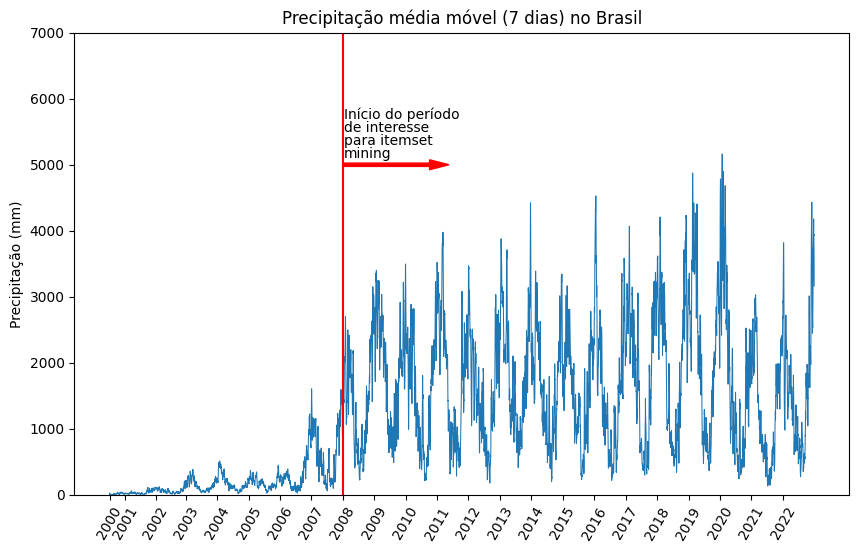

In [9]:
fig, axs = plt.subplots(figsize=(10, 6))
x_range = list(range(len(precipt_df)))
# sns.lineplot(data=precipt_df, x=x_range, y="Precipt", size=1, 
#              ax=axs, legend=False, label='Precipitação')
sns.lineplot(data=precipt_df, x=x_range, y="7_day_mean", size=1, 
             ax=axs, legend=False)

meds_per_year = precipt_df.groupby(by='ano_idx').count()['Data'].values
curr_year = 2000
curr_xtick = 0
xticks = list()
years = list()
for meds in meds_per_year:
    xticks.append(curr_xtick)
    years.append(curr_year)
    curr_xtick += meds
    curr_year += 1

plt.vlines(xticks[8], 0, 7000, colors="r")
plt.text(xticks[8]+10, 5700, "Início do período")
plt.text(xticks[8]+10, 5500, "de interesse")
plt.text(xticks[8]+10, 5300, "para itemset")
plt.text(xticks[8]+10, 5100, "mining")
plt.arrow(xticks[8]+10, 5000, 1000, 0, width=50, color='r')
plt.xticks(xticks, years, rotation=60)
plt.ylabel("Precipitação (mm)")
plt.title("Precipitação média móvel (7 dias) no Brasil")
plt.ylim((0, 7000))
# plt.savefig("assets/precipt_movel.png")
plt.show()

In [20]:
after_08_precipt_df.groupby(by='ano_idx').count()['Data'].values[8:]

array([365, 365, 365, 366, 365, 365])

[0, 366, 731, 1096, 1461, 1827, 2192, 2557, 2922, 3288, 3653, 4018, 4383, 4749, 5114, 5479]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


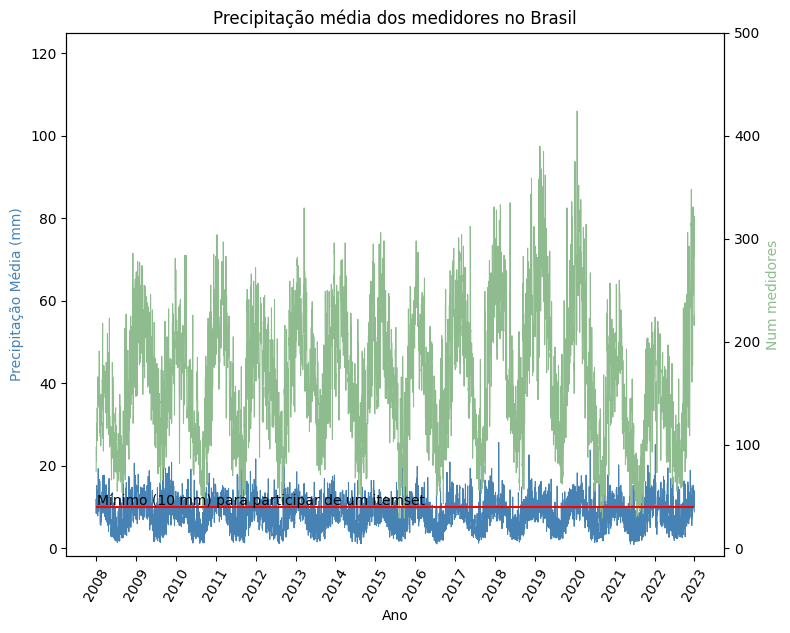

In [37]:
fig, axs1 = plt.subplots(figsize=(8, 6))

after_07_precipt_df = precipt_df[precipt_df['ano_idx'] > 7]
x_range = list(range(len(after_07_precipt_df)))

ax1_color = "steelblue"
sns.lineplot(data=after_07_precipt_df, x=x_range, y="Precipt Media", size=1, 
             ax=axs1, legend=False, label="precipt_media", color=ax1_color)

meds_per_year = after_07_precipt_df.groupby(by='ano_idx').count()['Data'].values
curr_year = 2008
curr_xtick = 0
xticks = list()
years = list()
xticks.append(curr_xtick)
years.append(curr_year)
for meds in meds_per_year:
    curr_xtick += meds
    curr_year += 1
    xticks.append(curr_xtick)
    years.append(curr_year)

print(xticks)
print(years)

axs1.set_ylabel("Precipitação Média (mm)", color=ax1_color)
axs1.set_ylim((-2, 125))

ax2 = axs1.twinx()  # instantiate a second axes that shares the same x-axis

ax2_color = "darkseagreen"
ax2.set_ylabel('Num medidores', color=ax2_color) 
ax2.set_ylim((-8, 500))
sns.lineplot(data=after_07_precipt_df, x=x_range, y="N Medicoes", size=1, 
             ax=ax2, legend=False, color=ax2_color)

# plt.vlines(xticks[8], 0, 500, colors="r", linestyles="dashed")
# plt.text(xticks[8]+10, 450, "Início do período")
# plt.text(xticks[8]+10, 435, "de interesse")
# plt.text(xticks[8]+10, 420, "para itemset")
# plt.text(xticks[8]+10, 405, "mining")
# plt.arrow(xticks[8]+10, 390, 900, 0, width=2, color='r', head_width=15, head_length=200)

line_y_pos = (500/125)*10
plt.hlines(line_y_pos, 0, len(after_07_precipt_df), colors="r")
plt.text(xticks[0]+10, line_y_pos+2, "Mínimo (10 mm) para participar de um itemset", c='black')

plt.title("Precipitação média dos medidores no Brasil")
fig.tight_layout()
axs1.set_xticks(xticks, years, rotation=60)
axs1.set_xlabel("Ano")
plt.savefig("assets/precipt_med_medidores.png")
plt.show()